In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [6]:
from warnings import filterwarnings
filterwarnings("ignore",category=FutureWarning)

In [7]:
heart = pd.read_excel('heart_disease.xlsx', sheet_name = 'Heart_disease')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [8]:
heart.shape

(908, 13)

In [9]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [10]:
heart.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [11]:
heart.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [12]:
heart.nunique()

age          49
sex           2
cp            4
trestbps     85
chol        228
fbs           2
restecg       3
thalch      122
exang         4
oldpeak      53
slope         3
thal          3
num           5
dtype: int64

In [13]:
heart['cp'].value_counts()

asymptomatic       495
non-anginal        203
atypical angina    165
typical angina      45
Name: cp, dtype: int64

In [14]:
heart['slope'].value_counts()

flat           453
upsloping      298
downsloping    157
Name: slope, dtype: int64

In [15]:
heart['num'].value_counts()

0    399
1    265
2    109
3    107
4     28
Name: num, dtype: int64

In [16]:
heart['num'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

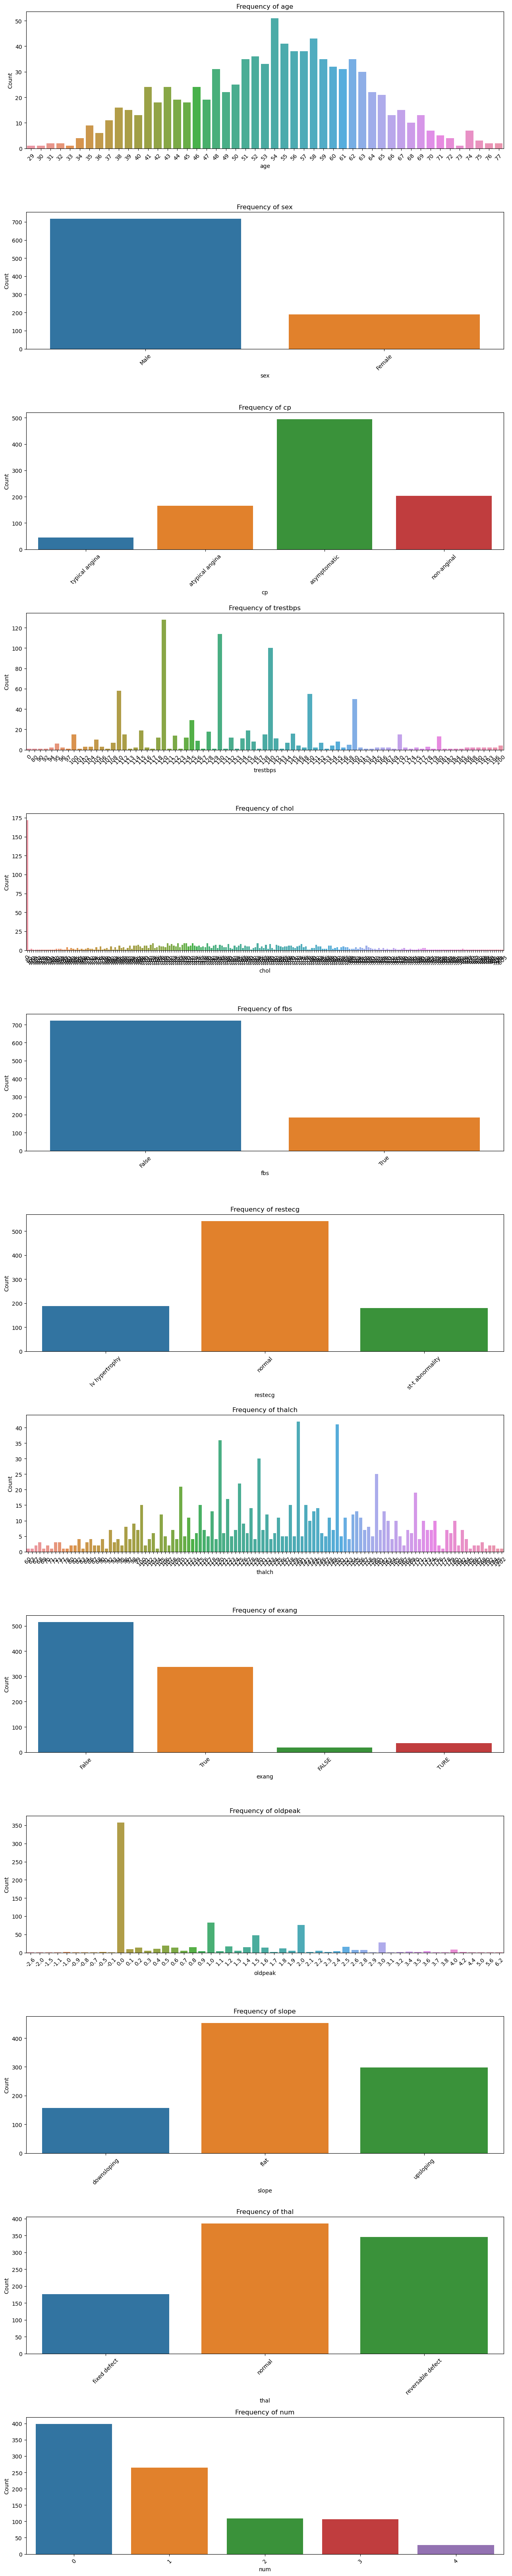

In [17]:
# Create a single figure with multiple subplots
fig, axes = plt.subplots(len(heart.columns), 1, figsize=(13, len(heart.columns) * 5))

# Plot count plots for each categorical column
for i, column in enumerate(heart.columns):
    sns.countplot(data=heart, x=column, ax=axes[i])
    axes[i].set_title(f'Frequency of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [18]:
# replace values (some true and false value are worng in this columns so replaced that)
heart.replace({'TURE': True, 'FALSE': False}, inplace=True)

In [19]:
heart['exang'].unique()

array([False,  True])

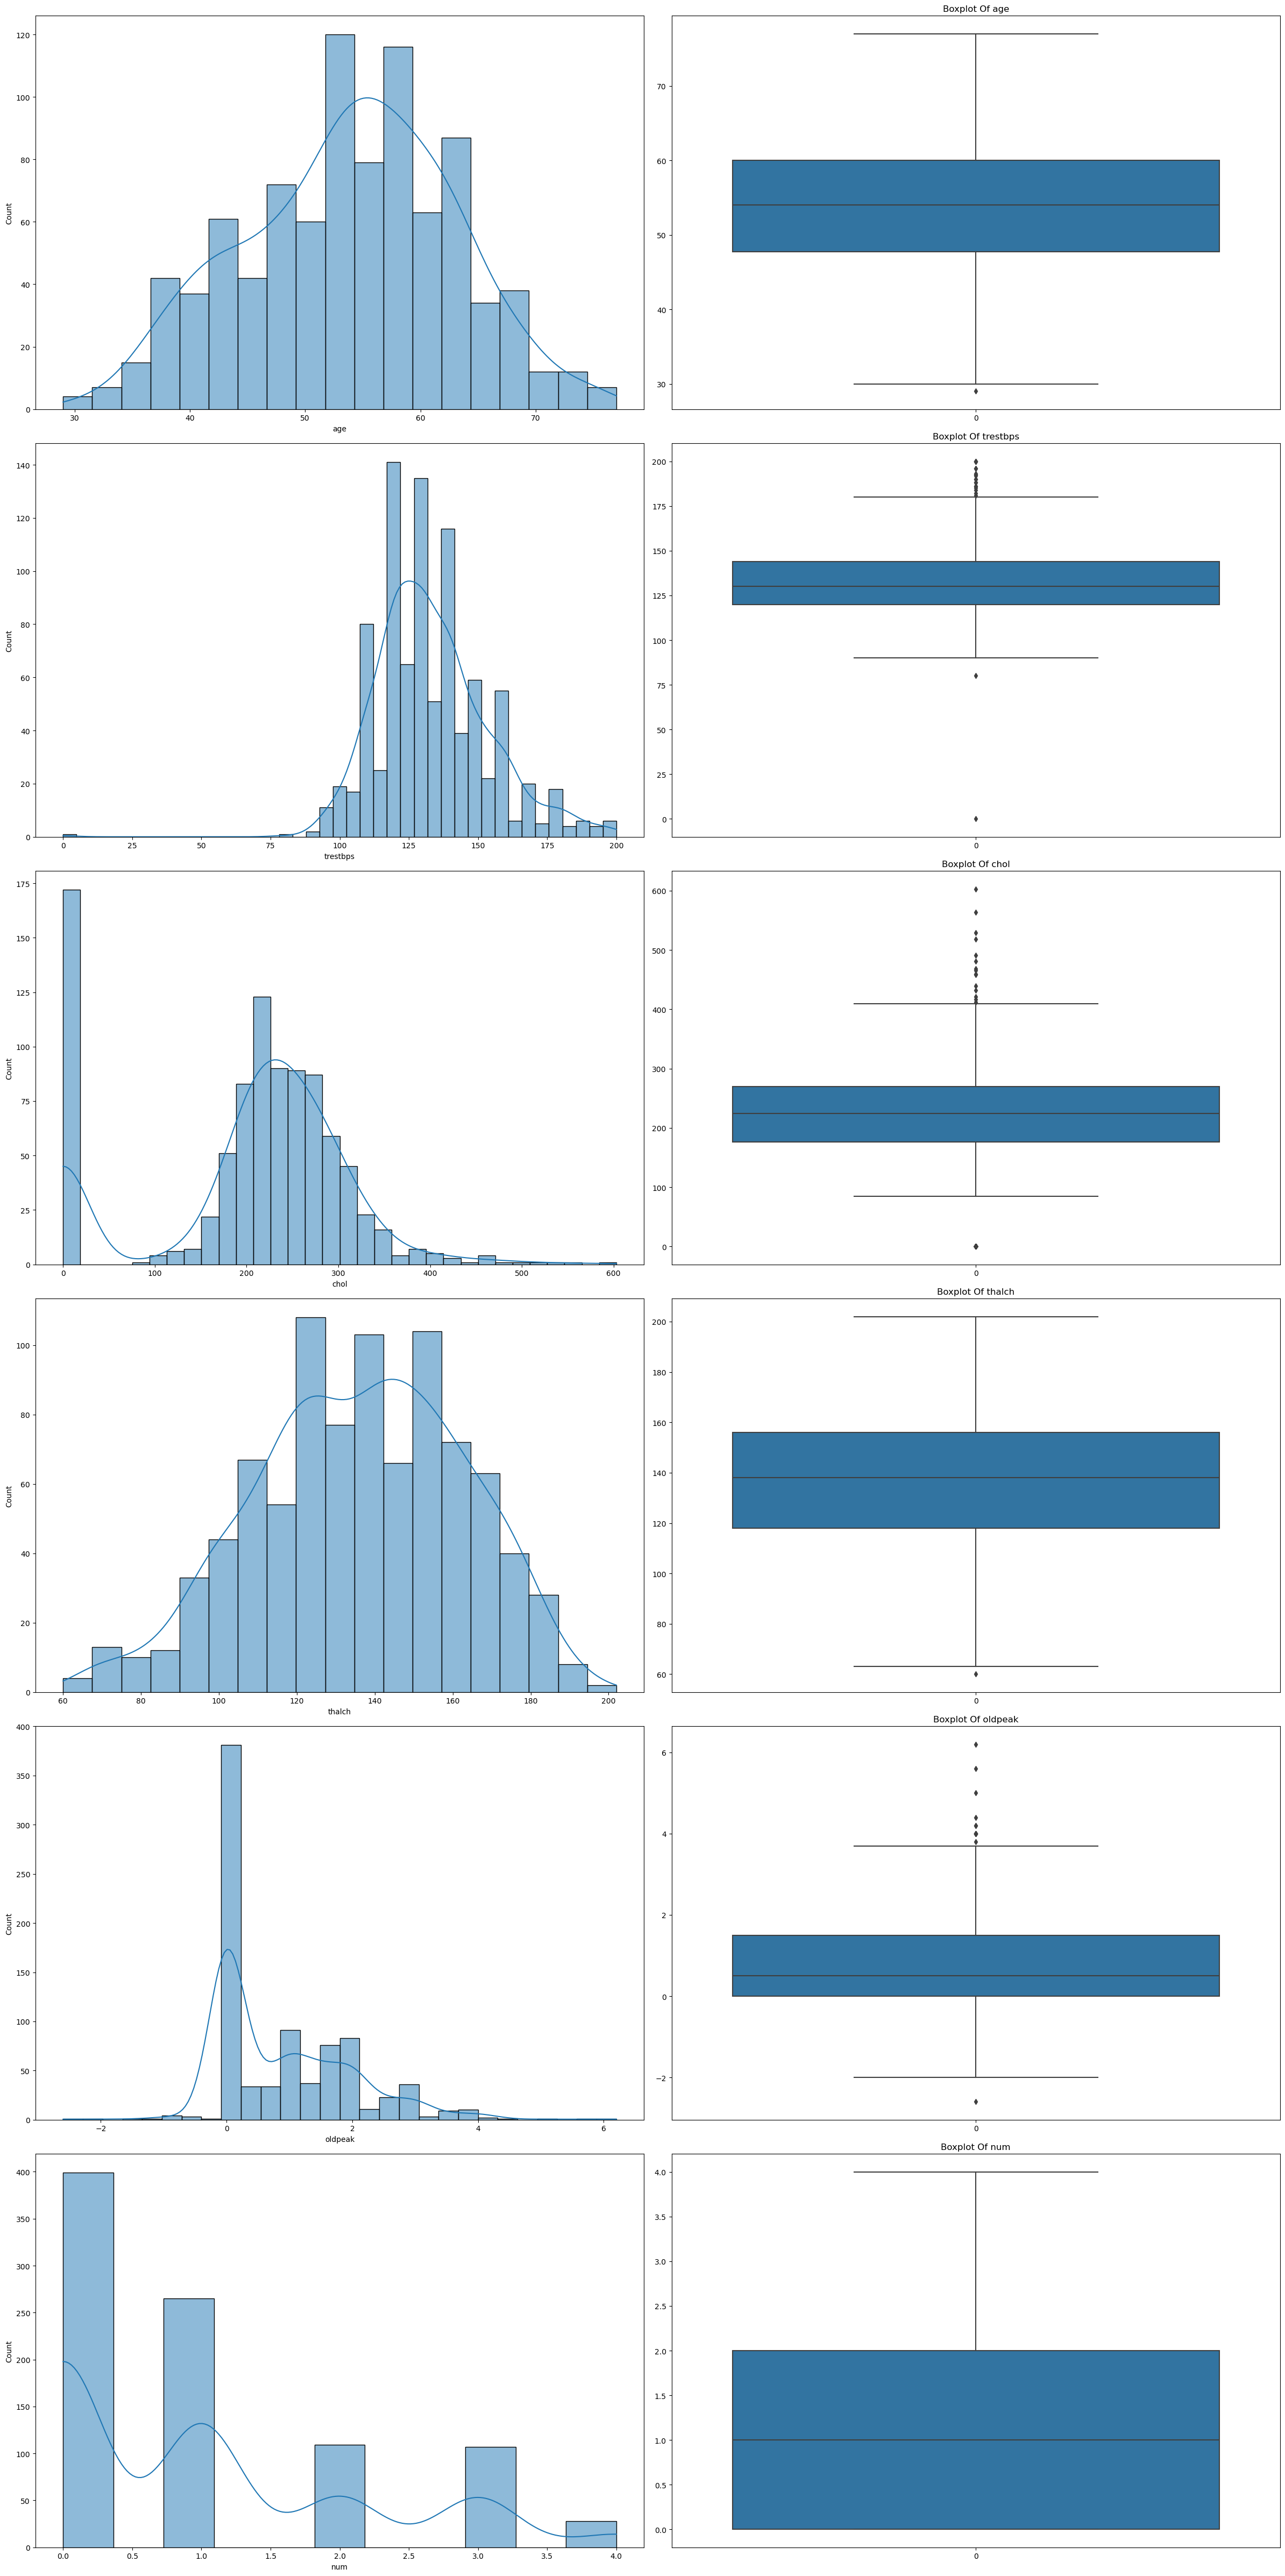

In [20]:
# Create a figure with 2 rows and 2 columns
fig, axes = plt.subplots(6,2,figsize=(24, 48))

sns.histplot(heart['age'], kde=True, ax=axes[0, 0])
sns.boxplot(heart['age'],ax=axes[0, 1])
axes[0, 1].set_title('Boxplot Of age')

sns.histplot(heart['trestbps'], kde=True, ax=axes[1, 0])
sns.boxplot(heart['trestbps'],ax=axes[1, 1])
axes[1, 1].set_title('Boxplot Of trestbps')

sns.histplot(heart['chol'],  kde=True, ax=axes[2, 0])
sns.boxplot(heart['chol'],ax=axes[2, 1])
axes[2, 1].set_title('Boxplot Of chol')

sns.histplot(heart['thalch'],  kde=True, ax=axes[3, 0])
sns.boxplot(heart['thalch'],ax=axes[3, 1])
axes[3, 1].set_title('Boxplot Of thalch')

sns.histplot(heart['oldpeak'],  kde=True, ax=axes[4, 0])
sns.boxplot(heart['oldpeak'],ax=axes[4, 1])
axes[4, 1].set_title('Boxplot Of oldpeak')

sns.histplot(heart['num'],  kde=True, ax=axes[5, 0])
sns.boxplot(heart['num'],ax=axes[5, 1])
axes[5, 1].set_title('Boxplot Of num')

plt.tight_layout()
plt.show()

In [21]:
# missing value imputation in oldpeak
heart['oldpeak'] = heart['oldpeak'].fillna(heart['oldpeak'].median())

In [22]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

In [23]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    bool   
 9   oldpeak   908 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(2), float64(1), int64(5), object(5)
memory usage: 79.9+ KB


In [24]:
def remove_outliers(heart, threshold=4):
    clean = heart.copy()                  
    for column in clean.select_dtypes(include=[np.number]).columns:
        z_scores = (clean[column] - clean[column].mean()) / clean[column].std()
        clean = clean[np.abs(z_scores) <= threshold]
    return clean

# Remove outliers using z score
cleaned = remove_outliers(heart)
cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 905 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       905 non-null    int64  
 1   sex       905 non-null    object 
 2   cp        905 non-null    object 
 3   trestbps  905 non-null    int64  
 4   chol      905 non-null    int64  
 5   fbs       905 non-null    bool   
 6   restecg   905 non-null    object 
 7   thalch    905 non-null    int64  
 8   exang     905 non-null    bool   
 9   oldpeak   905 non-null    float64
 10  slope     905 non-null    object 
 11  thal      905 non-null    object 
 12  num       905 non-null    int64  
dtypes: bool(2), float64(1), int64(5), object(5)
memory usage: 86.6+ KB


In [25]:
# encoded the categorical data
from sklearn.preprocessing import LabelEncoder

In [26]:
encoder = LabelEncoder()

cleaned['sex']= encoder.fit_transform(cleaned['sex'])
cleaned['cp']= encoder.fit_transform(cleaned['cp'])
cleaned['restecg']= encoder.fit_transform(cleaned['restecg'])
cleaned['slope']= encoder.fit_transform(cleaned['slope'])
cleaned['thal']= encoder.fit_transform(cleaned['thal'])

cleaned.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,True,0,150,False,2.3,0,0,0
1,41,1,1,135,203,False,1,132,False,0.0,1,0,0
2,57,1,0,140,192,False,1,148,False,0.4,1,0,0
3,52,1,3,118,186,False,0,190,False,0.0,1,0,0
4,57,1,0,110,201,False,1,126,True,1.5,1,0,0


# Split the data

In [27]:
from sklearn.model_selection import train_test_split

X = cleaned.iloc[:, 0:12]
y = cleaned.iloc[:, 12]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((724, 12), (181, 12), (724,), (181,))

In [28]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
10,30,0,3,170,237,False,2,170,False,0.0,0,0
846,63,1,0,160,230,True,1,105,True,1.0,1,1
363,43,0,1,120,215,False,2,175,False,0.0,0,2
825,52,1,0,125,212,False,1,168,False,1.0,2,2
796,62,1,0,150,0,True,2,78,False,2.0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
106,63,0,2,135,252,False,0,172,False,0.0,2,1
270,37,0,1,120,260,False,1,130,False,0.0,0,0
863,61,1,2,120,337,False,1,98,True,0.0,1,2
435,57,1,1,154,232,False,0,164,False,0.0,2,1


In [29]:
y_train

10     0
846    3
363    0
825    3
796    3
      ..
106    0
270    0
863    3
435    1
102    0
Name: num, Length: 724, dtype: int64

In [30]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, criterion='entropy')
model.fit(X_train,y_train)
yhat_train = model.predict(X_train)

In [31]:
yhat_train

array([0, 3, 0, 0, 3, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 0, 2, 1, 0,
       3, 1, 0, 0, 0, 0, 1, 0, 3, 1, 1, 0, 1, 0, 0, 1, 1, 1, 2, 0, 2, 0,
       3, 3, 0, 2, 0, 0, 3, 3, 3, 2, 0, 0, 0, 3, 1, 0, 1, 0, 1, 3, 1, 1,
       1, 2, 0, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 2, 1, 1, 1, 1, 0, 0, 1, 1, 0, 3, 0, 3, 0, 2, 1, 0, 0, 0, 1, 0,
       3, 2, 3, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 2, 0, 3, 0, 3, 0, 0, 0, 0, 0, 1, 0, 0, 3, 1, 0, 1, 2, 1, 0, 0,
       1, 2, 1, 0, 3, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 2, 0, 0,
       1, 3, 3, 3, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 2, 3, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 3, 1, 0, 1, 3, 3,
       0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 1, 0, 3, 0, 0, 0, 1, 0, 0, 2, 0, 0,
       1, 0, 0, 1, 3, 2, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 2, 0, 1,
       0, 0, 1, 3, 0, 0, 0, 1, 3, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3,
       1, 0, 1, 1, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 0,

# Evaluate the model on train and test

In [32]:
from sklearn.metrics import classification_report,confusion_matrix
con_mat = confusion_matrix(y_train,yhat_train) # on training
con_mat

array([[275,  25,   3,  13,   0],
       [ 68, 118,   9,  18,   0],
       [ 17,  33,  24,  19,   0],
       [ 17,  26,   9,  29,   0],
       [  4,   2,  11,   4,   0]], dtype=int64)

In [33]:
print(classification_report(y_train,yhat_train,zero_division=1))

              precision    recall  f1-score   support

           0       0.72      0.87      0.79       316
           1       0.58      0.55      0.57       213
           2       0.43      0.26      0.32        93
           3       0.35      0.36      0.35        81
           4       1.00      0.00      0.00        21

    accuracy                           0.62       724
   macro avg       0.62      0.41      0.41       724
weighted avg       0.61      0.62      0.59       724



In [34]:
yhat_test = model.predict(X_test) # on testing
con_mat1 = confusion_matrix(y_test,yhat_test)
con_mat1

array([[68, 10,  3,  2,  0],
       [22, 23,  3,  4,  0],
       [ 2,  9,  3,  2,  0],
       [ 8,  7,  3,  5,  0],
       [ 3,  2,  2,  0,  0]], dtype=int64)

In [35]:
print(classification_report(y_test,yhat_test,zero_division=1))

              precision    recall  f1-score   support

           0       0.66      0.82      0.73        83
           1       0.45      0.44      0.45        52
           2       0.21      0.19      0.20        16
           3       0.38      0.22      0.28        23
           4       1.00      0.00      0.00         7

    accuracy                           0.55       181
   macro avg       0.54      0.33      0.33       181
weighted avg       0.54      0.55      0.52       181



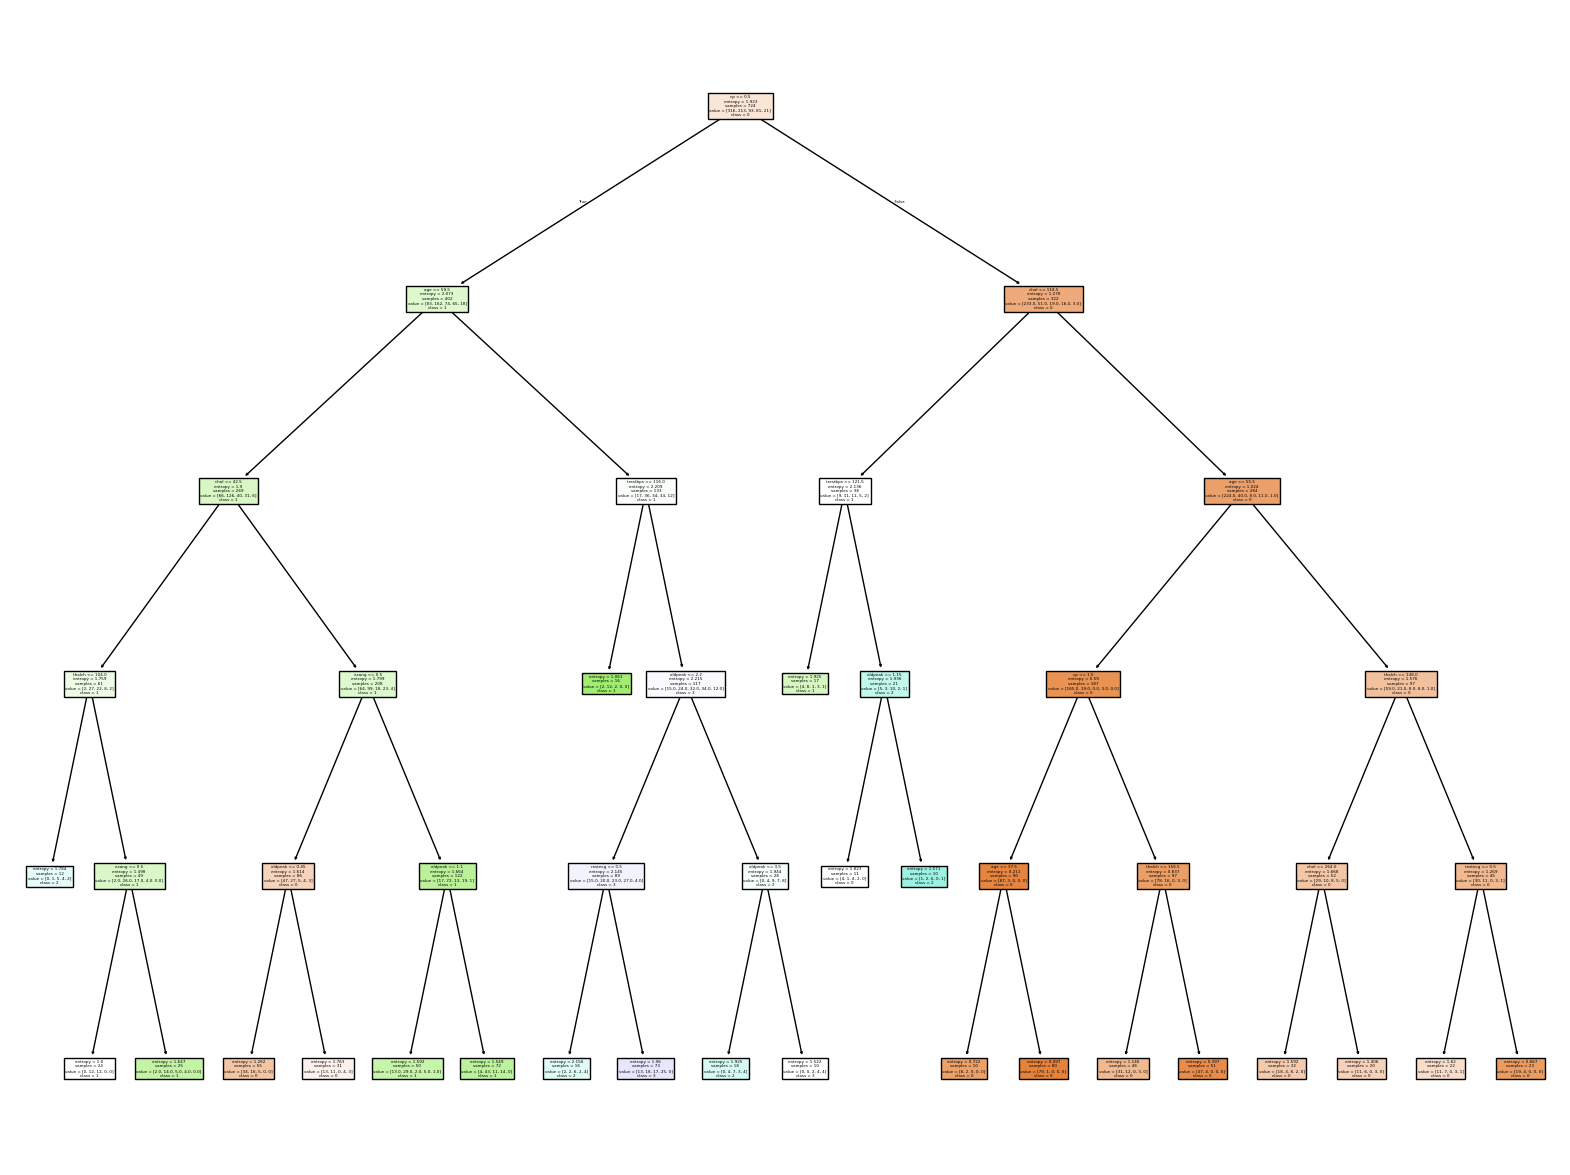

In [36]:
# visualization tree
from sklearn.tree import plot_tree
f_name = ['age','sex','cp','trestbps','chol','fbs','restecg','thalch','exang','oldpeak','slope','thal'] #feature names
c_name = ['0','1','2','3', '4'] #class 

#fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi=300)
plt.figure(figsize = (20,15))
plot_tree(model,
          feature_names = f_name, 
          class_names = c_name,
          filled = True)

plt.show()

# Building Decision Tree Classifier (CART) Using Gini Criteria

In [37]:
modelg = DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, criterion='gini')  # using gini
modelg.fit(X_train,y_train)
yhat_train = modelg.predict(X_train)

In [38]:
cm = confusion_matrix(y_train,yhat_train) # on training
cm

array([[270,  38,   7,   1,   0],
       [ 47, 150,  11,   5,   0],
       [ 11,  42,  38,   2,   0],
       [ 10,  45,  12,  14,   0],
       [  2,   6,  12,   1,   0]], dtype=int64)

In [39]:
print(classification_report(y_train,yhat_train,zero_division=1))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       316
           1       0.53      0.70      0.61       213
           2       0.47      0.41      0.44        93
           3       0.61      0.17      0.27        81
           4       1.00      0.00      0.00        21

    accuracy                           0.65       724
   macro avg       0.68      0.43      0.43       724
weighted avg       0.66      0.65      0.62       724



In [40]:
yhat_test = modelg.predict(X_test) # on testing
cm = confusion_matrix(y_test,yhat_test)
cm

array([[65, 14,  4,  0,  0],
       [17, 31,  4,  0,  0],
       [ 2, 10,  3,  1,  0],
       [ 6, 12,  5,  0,  0],
       [ 2,  3,  2,  0,  0]], dtype=int64)

In [41]:
print(classification_report(y_test,yhat_test,zero_division=1))

              precision    recall  f1-score   support

           0       0.71      0.78      0.74        83
           1       0.44      0.60      0.51        52
           2       0.17      0.19      0.18        16
           3       0.00      0.00      0.00        23
           4       1.00      0.00      0.00         7

    accuracy                           0.55       181
   macro avg       0.46      0.31      0.29       181
weighted avg       0.50      0.55      0.50       181



#### model is underfitting on both entropy and gini criterion

# Hyoerparameter tuning with gridsearch CV

### Experiment with different hyperparameters such as maximum depth, minium samples split, and criterion.

In [42]:
from sklearn.model_selection import GridSearchCV

tree = DecisionTreeClassifier()    # intialize the decision tree model

param_grid = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [None,4,5,9,11,13,15,17,18,19,20,22],
    'min_samples_split': [2,4,5,6,8,9,10,11,12,14,15,18],
    'min_samples_leaf': [1, 2, 5,6,8,9,10,12,14,16,18,20]         # created dict for parameters
}

grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=5,
                           n_jobs=-1, verbose=1) # intialize the gridsearch cv model
grid_search.fit(X_train, y_train)   # fitted the model

best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

Fitting 5 folds for each of 3456 candidates, totalling 17280 fits
Best parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 14, 'min_samples_split': 2}


In [44]:
final_model = DecisionTreeClassifier(**best_params)
final_model.fit(X_train, y_train)

y_pred = final_model.predict(X_train)  # on training data
print(classification_report(y_train,y_pred,zero_division=1))

              precision    recall  f1-score   support

           0       0.73      0.86      0.79       316
           1       0.56      0.51      0.54       213
           2       0.45      0.35      0.40        93
           3       0.34      0.31      0.32        81
           4       0.36      0.24      0.29        21

    accuracy                           0.61       724
   macro avg       0.49      0.45      0.47       724
weighted avg       0.59      0.61      0.60       724



In [45]:
y_predtest = final_model.predict(X_test) # on testing data
print(classification_report(y_test, y_predtest, zero_division=1))

              precision    recall  f1-score   support

           0       0.68      0.81      0.74        83
           1       0.45      0.42      0.44        52
           2       0.17      0.19      0.18        16
           3       0.38      0.22      0.28        23
           4       0.00      0.00      0.00         7

    accuracy                           0.54       181
   macro avg       0.34      0.33      0.33       181
weighted avg       0.50      0.54      0.51       181



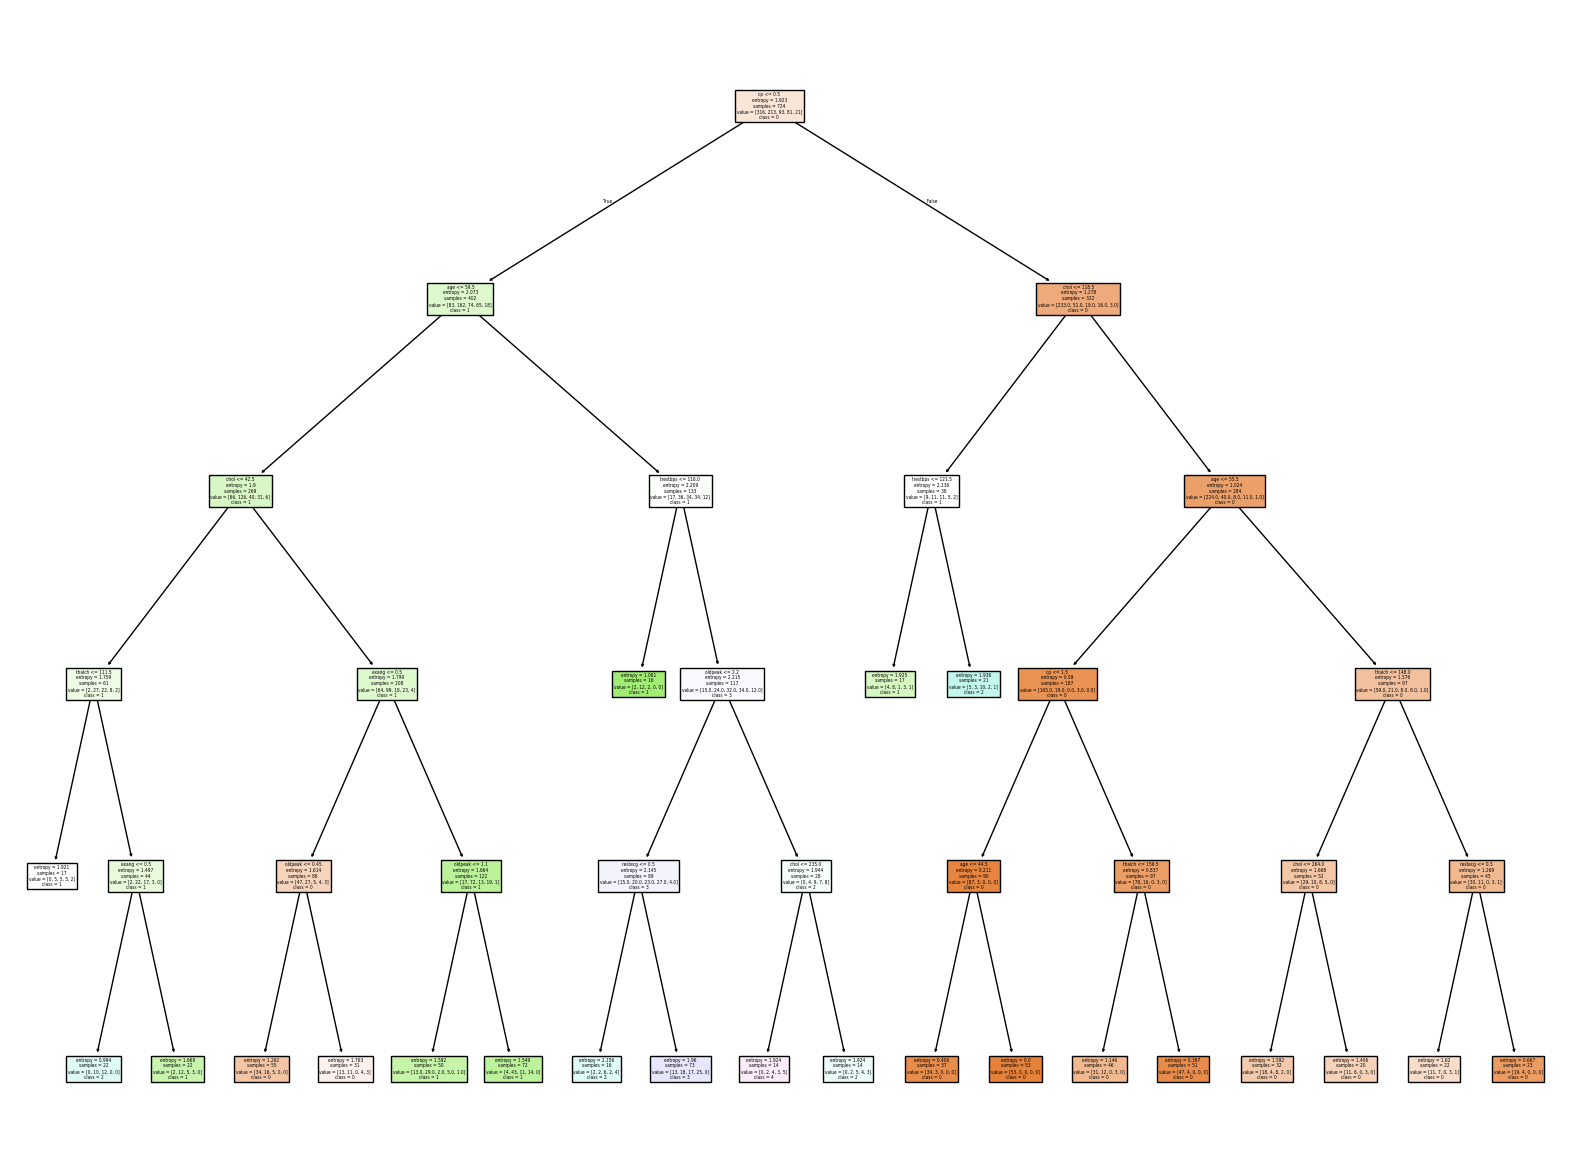

In [46]:
#visualization tree
fn=['age','sex','cp','trestbps','chol','fbs','restecg','thalch','exang','oldpeak','slope','thal'] #feature names
cn=['0','1','2','3', '4'] #class 

#fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi=300)
plt.figure(figsize = (20,15))
plot_tree(final_model,
          feature_names = fn, 
          class_names = cn,
          filled = True)

plt.show()

In [ ]:
Interview Questions:
1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
2. What is the difference between the Label encoding and One-hot encoding?

1 = 
Criterion: Choice between Gini impurity and entropy.
Max Depth: Controls tree depth to avoid overfitting.
Min Samples Split: Minimum samples needed to split a node.
Min Samples Leaf: Minimum samples needed at a leaf node.
Max Features: Number of features to consider when looking for the best split.
Max Leaf Nodes: Maximum number of leaf nodes.
Min Impurity Decrease: Minimum impurity decrease required for a split.
Splitter: Strategy for choosing splits
hyperparameters that can significantly impact the model's performance, both in terms of accuracy and generalization

2=
Label Encoding:
Assigns an integer to each category.
Implies an ordinal relationship.
Simple and memory efficient.
Suitable for ordinal features and binary categorical features.

One-Hot Encoding:
Creates binary columns for each category.
Does not imply any ordinal relationship.
Can lead to high dimensionality.
Suitable for nominal features and most machine learning algorithms.